#Practica preparacion



Se estan realizndo proceso de limpieza de datos

In [1]:
#Importamos las librerías necesarias
import pandas as pd
import seaborn as sbn
import numpy as np
import matplotlib.pyplot as plt
from seaborn import load_dataset
import io
import seaborn as sns

In [2]:
from google.colab import files

uploaded = files.upload()
Isalary = pd.read_csv(io.BytesIO(uploaded['SalaryData.csv']))





Saving SalaryData.csv to SalaryData.csv


In [3]:
Isalary.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [4]:
na_values =('na.nan','NA','NaN','nan','inf')
Isalary = Isalary.replace(na_values,np.nan)

In [5]:
Isalary.isna().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [6]:
Isalary.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [7]:
Isalary.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0


Se identifica las cantidades de personas que estudiaron en diferentes niveles

In [8]:
value_counts = Isalary['Education Level'].value_counts()
count = value_counts["Bachelor's"]
print(count)


224


Identificar valores en la columna 'education level'

In [9]:
valores_unicos = Isalary['Education Level'].unique()  # Obtiene los valores únicos en la columna especificada
print(valores_unicos)  

["Bachelor's" "Master's" 'PhD' nan]


Se quitaran los valores nan utilizando la moda y la media para evitar que los datos se corrompan


In [10]:
#Age
moda_age = Isalary['Age'].mode()[0]
Isalary['Age'].fillna(moda_age, inplace=True)
print(Isalary)

      Age  Gender Education Level                      Job Title  \
0    32.0    Male      Bachelor's              Software Engineer   
1    28.0  Female        Master's                   Data Analyst   
2    45.0    Male             PhD                 Senior Manager   
3    36.0  Female      Bachelor's                Sales Associate   
4    52.0    Male        Master's                       Director   
..    ...     ...             ...                            ...   
370  35.0  Female      Bachelor's       Senior Marketing Analyst   
371  43.0    Male        Master's         Director of Operations   
372  29.0  Female      Bachelor's         Junior Project Manager   
373  34.0    Male      Bachelor's  Senior Operations Coordinator   
374  44.0  Female             PhD        Senior Business Analyst   

     Years of Experience    Salary  
0                    5.0   90000.0  
1                    3.0   65000.0  
2                   15.0  150000.0  
3                    7.0   60000.0 

In [11]:
#Gender
moda_genero = Isalary['Gender'].mode()[0]
Isalary['Gender'].fillna(moda_genero, inplace=True)
print(Isalary)

      Age  Gender Education Level                      Job Title  \
0    32.0    Male      Bachelor's              Software Engineer   
1    28.0  Female        Master's                   Data Analyst   
2    45.0    Male             PhD                 Senior Manager   
3    36.0  Female      Bachelor's                Sales Associate   
4    52.0    Male        Master's                       Director   
..    ...     ...             ...                            ...   
370  35.0  Female      Bachelor's       Senior Marketing Analyst   
371  43.0    Male        Master's         Director of Operations   
372  29.0  Female      Bachelor's         Junior Project Manager   
373  34.0    Male      Bachelor's  Senior Operations Coordinator   
374  44.0  Female             PhD        Senior Business Analyst   

     Years of Experience    Salary  
0                    5.0   90000.0  
1                    3.0   65000.0  
2                   15.0  150000.0  
3                    7.0   60000.0 

In [12]:
#Education level
moda_elevel = Isalary['Education Level'].mode()[0]
Isalary['Education Level'].fillna(moda_elevel, inplace=True)
print(Isalary)

      Age  Gender Education Level                      Job Title  \
0    32.0    Male      Bachelor's              Software Engineer   
1    28.0  Female        Master's                   Data Analyst   
2    45.0    Male             PhD                 Senior Manager   
3    36.0  Female      Bachelor's                Sales Associate   
4    52.0    Male        Master's                       Director   
..    ...     ...             ...                            ...   
370  35.0  Female      Bachelor's       Senior Marketing Analyst   
371  43.0    Male        Master's         Director of Operations   
372  29.0  Female      Bachelor's         Junior Project Manager   
373  34.0    Male      Bachelor's  Senior Operations Coordinator   
374  44.0  Female             PhD        Senior Business Analyst   

     Years of Experience    Salary  
0                    5.0   90000.0  
1                    3.0   65000.0  
2                   15.0  150000.0  
3                    7.0   60000.0 

In [13]:
#job title
moda_jtitle = Isalary['Job Title'].mode()[0]
Isalary['Job Title'].fillna(moda_jtitle, inplace=True)
print(Isalary)

      Age  Gender Education Level                      Job Title  \
0    32.0    Male      Bachelor's              Software Engineer   
1    28.0  Female        Master's                   Data Analyst   
2    45.0    Male             PhD                 Senior Manager   
3    36.0  Female      Bachelor's                Sales Associate   
4    52.0    Male        Master's                       Director   
..    ...     ...             ...                            ...   
370  35.0  Female      Bachelor's       Senior Marketing Analyst   
371  43.0    Male        Master's         Director of Operations   
372  29.0  Female      Bachelor's         Junior Project Manager   
373  34.0    Male      Bachelor's  Senior Operations Coordinator   
374  44.0  Female             PhD        Senior Business Analyst   

     Years of Experience    Salary  
0                    5.0   90000.0  
1                    3.0   65000.0  
2                   15.0  150000.0  
3                    7.0   60000.0 

In [14]:
#Years Experience
moda_yexp = Isalary['Years of Experience'].mode()[0]
Isalary['Years of Experience'].fillna(moda_yexp, inplace=True)
print(Isalary)

      Age  Gender Education Level                      Job Title  \
0    32.0    Male      Bachelor's              Software Engineer   
1    28.0  Female        Master's                   Data Analyst   
2    45.0    Male             PhD                 Senior Manager   
3    36.0  Female      Bachelor's                Sales Associate   
4    52.0    Male        Master's                       Director   
..    ...     ...             ...                            ...   
370  35.0  Female      Bachelor's       Senior Marketing Analyst   
371  43.0    Male        Master's         Director of Operations   
372  29.0  Female      Bachelor's         Junior Project Manager   
373  34.0    Male      Bachelor's  Senior Operations Coordinator   
374  44.0  Female             PhD        Senior Business Analyst   

     Years of Experience    Salary  
0                    5.0   90000.0  
1                    3.0   65000.0  
2                   15.0  150000.0  
3                    7.0   60000.0 

In [15]:
#salary
media_salary = Isalary['Salary'].mean()
Isalary['Salary'].fillna(media_salary, inplace=True)
print(Isalary)

      Age  Gender Education Level                      Job Title  \
0    32.0    Male      Bachelor's              Software Engineer   
1    28.0  Female        Master's                   Data Analyst   
2    45.0    Male             PhD                 Senior Manager   
3    36.0  Female      Bachelor's                Sales Associate   
4    52.0    Male        Master's                       Director   
..    ...     ...             ...                            ...   
370  35.0  Female      Bachelor's       Senior Marketing Analyst   
371  43.0    Male        Master's         Director of Operations   
372  29.0  Female      Bachelor's         Junior Project Manager   
373  34.0    Male      Bachelor's  Senior Operations Coordinator   
374  44.0  Female             PhD        Senior Business Analyst   

     Years of Experience    Salary  
0                    5.0   90000.0  
1                    3.0   65000.0  
2                   15.0  150000.0  
3                    7.0   60000.0 

Se identificaran los 5 trabajos que mas se repiten dentro de los datos a analizar 

In [16]:
top_5_frecuencias = Isalary['Job Title'].value_counts().head(5)

print(top_5_frecuencias)

Director of Marketing       14
Director of Operations      11
Senior Business Analyst     10
Senior Marketing Analyst     9
Senior Marketing Manager     9
Name: Job Title, dtype: int64


Se detectaron 3 tipos de datos de tipo object, los cuales no permiten realizar los modelos esperados por lo cual se relizara trasformacion del tipo de dato y si es el caso exclusion del dato.

Se realiza one hot encoding para los datos de 'gender'

In [17]:
df1 = Isalary

one_hot = pd.get_dummies(df1['Gender'])
df = pd.concat([df1, one_hot], axis=1)
df4 = df.drop('Gender', axis=1)
print(df4)

      Age Education Level                      Job Title  Years of Experience  \
0    32.0      Bachelor's              Software Engineer                  5.0   
1    28.0        Master's                   Data Analyst                  3.0   
2    45.0             PhD                 Senior Manager                 15.0   
3    36.0      Bachelor's                Sales Associate                  7.0   
4    52.0        Master's                       Director                 20.0   
..    ...             ...                            ...                  ...   
370  35.0      Bachelor's       Senior Marketing Analyst                  8.0   
371  43.0        Master's         Director of Operations                 19.0   
372  29.0      Bachelor's         Junior Project Manager                  2.0   
373  34.0      Bachelor's  Senior Operations Coordinator                  7.0   
374  44.0             PhD        Senior Business Analyst                 15.0   

       Salary  Female  Male

Para 'Education level' se utlizara level encoding debido a que los datos de nivel educacional poseen un orden jerarquico donde:
Bachelor's = 0
Master´s = 1
PhD = 2

In [18]:
codificacion = {"Bachelor's": 0, "Master's": 1, 'PhD': 2}
df4['Educacion Level'] = df4['Education Level'].map(codificacion)
print(df4)

      Age Education Level                      Job Title  Years of Experience  \
0    32.0      Bachelor's              Software Engineer                  5.0   
1    28.0        Master's                   Data Analyst                  3.0   
2    45.0             PhD                 Senior Manager                 15.0   
3    36.0      Bachelor's                Sales Associate                  7.0   
4    52.0        Master's                       Director                 20.0   
..    ...             ...                            ...                  ...   
370  35.0      Bachelor's       Senior Marketing Analyst                  8.0   
371  43.0        Master's         Director of Operations                 19.0   
372  29.0      Bachelor's         Junior Project Manager                  2.0   
373  34.0      Bachelor's  Senior Operations Coordinator                  7.0   
374  44.0             PhD        Senior Business Analyst                 15.0   

       Salary  Female  Male

Y para 'job title' se utilizara one hot encoding

In [19]:

one_hot = pd.get_dummies(df4['Job Title'])
df4 = pd.concat([df4, one_hot], axis=1)
df6 = df4.drop('Job Title', axis=1)
print(df6)

      Age Education Level  Years of Experience    Salary  Female  Male  \
0    32.0      Bachelor's                  5.0   90000.0       0     1   
1    28.0        Master's                  3.0   65000.0       1     0   
2    45.0             PhD                 15.0  150000.0       0     1   
3    36.0      Bachelor's                  7.0   60000.0       1     0   
4    52.0        Master's                 20.0  200000.0       0     1   
..    ...             ...                  ...       ...     ...   ...   
370  35.0      Bachelor's                  8.0   85000.0       1     0   
371  43.0        Master's                 19.0  170000.0       0     1   
372  29.0      Bachelor's                  2.0   40000.0       1     0   
373  34.0      Bachelor's                  7.0   90000.0       0     1   
374  44.0             PhD                 15.0  150000.0       1     0   

     Educacion Level  Account Manager  Accountant  Administrative Assistant  \
0                  0            

Validacion de limpieza y transformcion

In [20]:
df4.isna().sum()

Age                    0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
                      ..
UX Designer            0
UX Researcher          0
VP of Finance          0
VP of Operations       0
Web Developer          0
Length: 182, dtype: int64

Se evaluaran las extraxiones de outliers utlilizando los graficos de boxplot

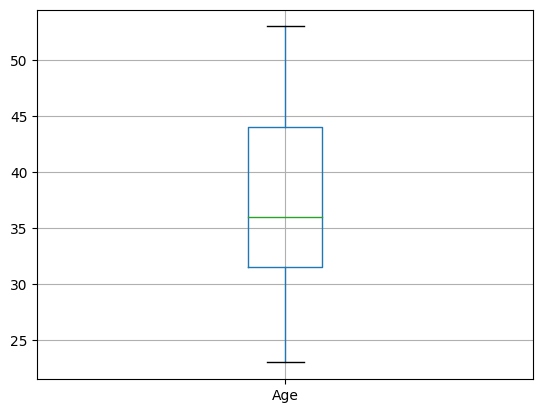

In [21]:
#Age
df4.boxplot(column=['Age'])
plt.show()

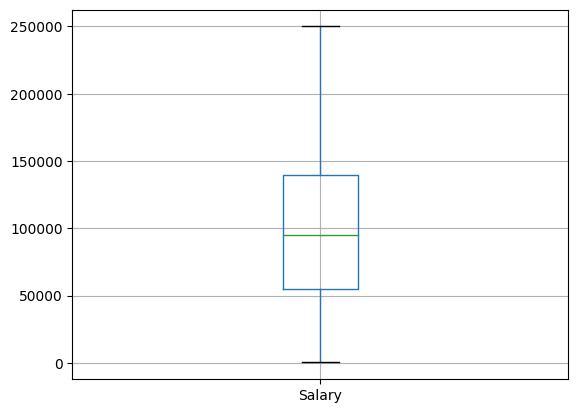

In [22]:
#Salary
df4.boxplot(column=['Salary'])
plt.show()

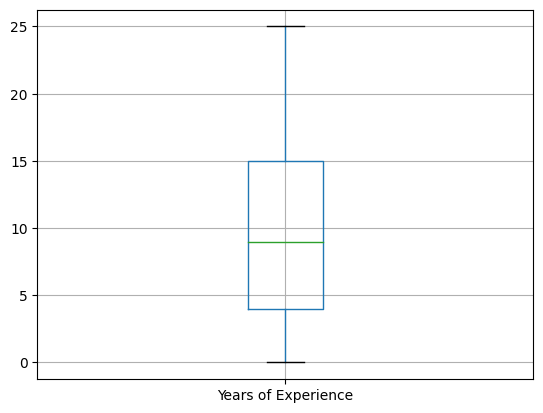

In [23]:
#Years experience
df4.boxplot(column=['Years of Experience'])
plt.show()

Tras el analisis de estos tres datos a travez de los diagrama de cajas se determino que no existen outliers en la datos que se estan trabajando

Se evaluaran las correlaciones entro los datos del data

In [24]:

corr_matrix = df4.corr()
corr_matrix["Salary"].sort_values(ascending=False)

<ipython-input-24-287e923dd8c2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df4.corr()


Salary                                   1.000000
Years of Experience                      0.926629
Age                                      0.921368
Educacion Level                          0.669389
Director of Marketing                    0.264388
                                           ...   
Junior Sales Representative             -0.130915
Junior Financial Analyst                -0.136982
Junior Marketing Coordinator            -0.143078
Junior Business Analyst                 -0.155419
Junior Business Development Associate   -0.171839
Name: Salary, Length: 180, dtype: float64

Ahora se desplegara un mapa de calor para entregar otra forma de presentar las correlaciones

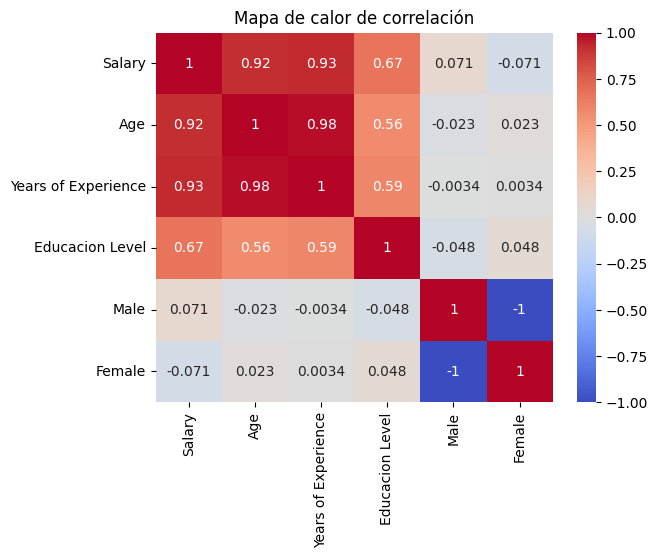

In [25]:
subset = df4[['Salary','Age','Years of Experience','Educacion Level','Male','Female']]
correlation_matrix = subset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación')
plt.show()


Grafico de barras donde la variable independiente es la edas(years) y la dependiente el sueldo(salary)

Text(0.5, 0, 'Age')

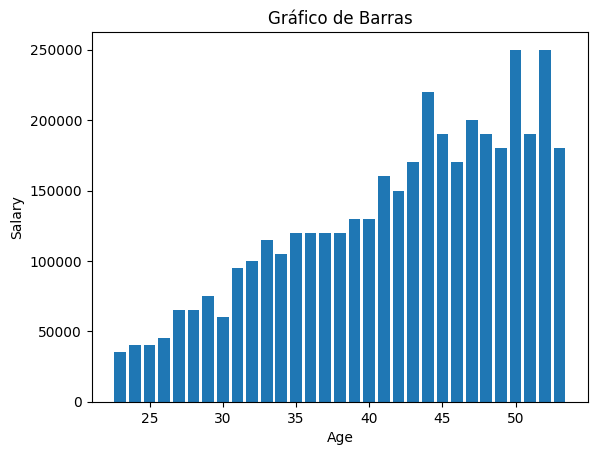

In [26]:
plt.bar(df4['Age'],df4['Salary'] )
plt.title('Gráfico de Barras')
plt.ylabel('Salary')
plt.xlabel('Age')

Como se visualizo anteriormente en el mapa de calor, la tendencia indica y la correlacion positiva indica que mientras mas años tengan los trabajadores(Age) su salario(salary) aumenta.

Grafico de barras donde la variable  dependiente (y) es salary y la independiente (x) años de experiencia



Text(0.5, 0, 'Years of Experience')

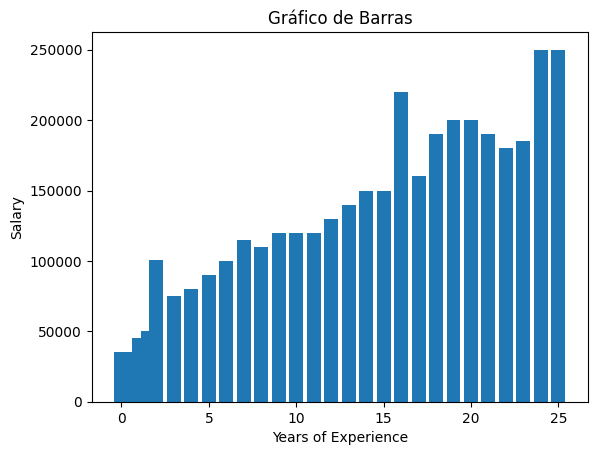

In [27]:
plt.bar(df4['Years of Experience'],df4['Salary'] )
plt.title('Gráfico de Barras')
plt.ylabel('Salary')
plt.xlabel('Years of Experience')

Del grafico anterior se puede inferir que los años de experiencia en el area siguen la misma tendencia que la edad de los trabajadores

grafico de dispersion para el salario de un director de marketing a travez de los años de experiencia


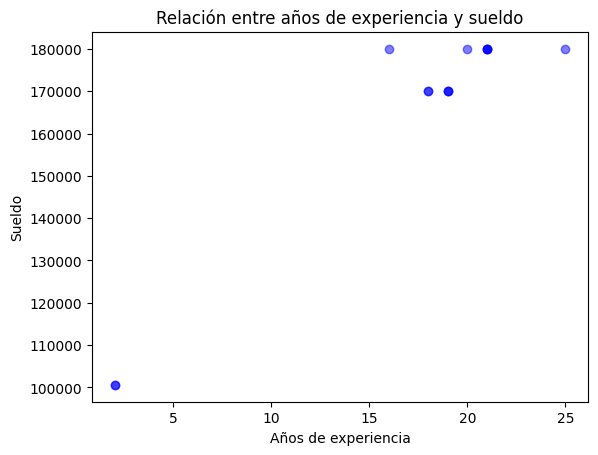

In [28]:

puesto_especifico = 'Director of Marketing'
df_filtrado = df4[df4['Job Title'] == puesto_especifico]

plt.scatter(df_filtrado['Years of Experience'], df_filtrado['Salary'], c='blue', alpha=0.5)


plt.xlabel('Años de experiencia')
plt.ylabel('Sueldo')
plt.title('Relación entre años de experiencia y sueldo')


plt.show()

Grafico barras de sueldo (y) por Education level

Text(0.5, 0, 'Nivel educacional')

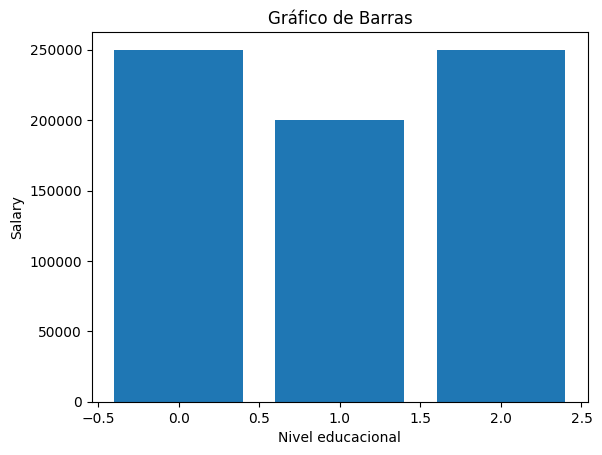

In [30]:
plt.bar(df4['Educacion Level'],df4['Salary'] )
plt.title('Gráfico de Barras')
plt.ylabel('Salary')
plt.xlabel('Nivel educacional')

# Modelo de clasificacion

In [66]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split #permkte realizar divicion entre test
from sklearn.linear_model import LinearRegression #para regresion linela
from sklearn.svm import SVR #subvector regtecion
from sklearn.tree import DecisionTreeRegressor, plot_tree #para un dibujo
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #error absoluto medio,cuadratico medio y score

Ajustar datos

In [48]:
df7 = df4

In [98]:
#datos_columna = df7['Salary'].values.reshape(-1, 1)
#datos_columna = df7['Salary'].to_frame()
#datos_columna = df7.assign(new_salary=df7['Salary'])
import pandas as pd
import numpy as np
columna = ['Age','Years of Experience','Educacion Level']
matriz_X= df7[columna].to_numpy()


In [99]:
#datos_columna = df7['Age'].values.reshape(-1, 1)
#datos_columna = df7['Age'].to_frame()
#datos_columna = df7.assign(new_Age=df7['Age'])
columna = df7['Salary']
matriz_y=columna.values.reshape(-1,1)

Se divide la data entre train  y test

In [100]:
X = matriz_X
y = matriz_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [101]:
#Crea Modelos
lr = LinearRegression()
svr = SVR()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()

In [102]:
# Entrena Modelos con la data de Train
lr.fit(X_train, y_train)
svr.fit(X_train, y_train)
dtr.fit(X_train, y_train)
rfr.fit(X_train, y_train)

# Plot Árbol de Decisión
#plot_tree(dtr)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-102-8c9ce09e0cd2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


RandomForestRegressor()

In [103]:
models = [lr, svr, dtr, rfr]
for model in models:
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{model.__class__.__name__}: MAE={mae:.2f}, MSE={mse:.2f}, R2={r2:.2f}')

LinearRegression: MAE=12703.68, MSE=281331314.48, R2=0.88
SVR: MAE=38848.61, MSE=2339782212.68, R2=-0.02
DecisionTreeRegressor: MAE=14946.30, MSE=578924989.71, R2=0.75
RandomForestRegressor: MAE=13062.61, MSE=362041794.04, R2=0.84


In [63]:
!pip install -q gradio
import gradio as gr 
import requests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.3/288.3 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.8 MB/s eta 0:0

In [ ]:
def predict(Age:float,
            anos_experiencia:float,
            nivel_educacional:int):
    input_df7=[[Age,
                anos_experiencia,
                nivel_educacional]]
    prediction= lr.predict(input_df7)[0] #Acá se coloca el mejor modelo seleccionado
    return prediction

inputs=[gr.inputs.Slider(minimum=0,maximum=90,label="Edad"),
        gr.inputs.Slider(minimum=0,maximum=90,label="años experiencia"),
        gr.inputs.Slider(minimum=0,maximum=3,label="Tipo educacion 1:bachillerato - 2:master - 3:phd")]

output=gr.outputs.Textbox(label="Predice el sueldo por edad,nivel educativo y años experiencia")

gr.Interface(fn=predict,
             inputs=inputs,
             outputs=output).launch(debug=True,share=True)

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:89: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:93: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://7fff2179d7e4967065.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
